In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Data Sets\preprocessd_data_cleaned.csv")

In [3]:
df


,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


In [4]:
#churen is the target column
x=df.drop('churn',axis=1)
y=df['churn']
x.shape,y.shape

((3406, 10), (3406,))

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2724, 10), (682, 10), (2724,), (682,))

**Decision Tree**

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import power_transform
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import SVC


In [7]:
# With out hyperparamaeter tuining

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

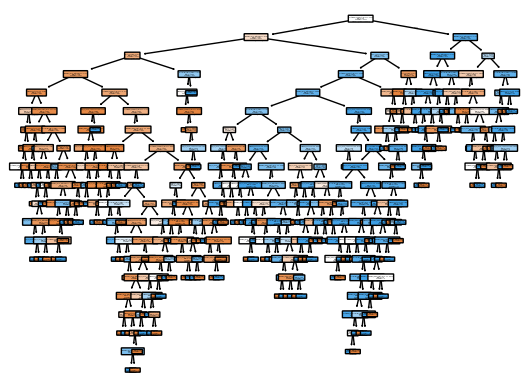

In [9]:

plot_tree(dtree,
         feature_names=x.columns,
         filled=True,
         rounded=True)
plt.show()

In [10]:

dtree.tree_.feature

array([ 9,  5,  3,  5,  8,  8,  1,  1,  9, -2, -2, -2, -2, -2,  7,  8,  8,
        8, -2, -2, -2, -2,  6,  8,  8,  1, -2,  1,  2, -2,  2, -2, -2,  5,
       -2,  2, -2, -2, -2,  2,  1, -2, -2, -2,  1,  0, -2, -2,  7,  5,  7,
       -2,  2,  9, -2, -2, -2,  2, -2, -2,  1,  1, -2, -2, -2,  9,  2,  7,
        2, -2,  2,  0, -2, -2, -2,  2, -2,  2, -2,  2,  8, -2, -2, -2, -2,
        9, -2,  7,  8,  6,  6, -2,  5, -2, -2, -2,  6, -2, -2,  9,  9,  1,
        6,  8, -2,  2, -2, -2, -2,  1,  8,  7, -2,  1, -2, -2,  7,  7,  5,
        5,  1, -2, -2,  8, -2,  1,  5, -2, -2, -2,  7,  1, -2, -2, -2,  2,
       -2,  8, -2,  1, -2, -2, -2,  2, -2,  2,  5,  8, -2, -2, -2,  1, -2,
       -2, -2,  7,  1,  5,  4, -2, -2, -2, -2,  1,  5,  6, -2,  6, -2, -2,
        0,  1,  2, -2, -2,  1, -2, -2, -2,  1,  6, -2, -2,  5,  1, -2, -2,
        7,  7, -2, -2, -2,  6,  8, -2,  9, -2,  1, -2,  2, -2, -2, -2,  4,
        9,  5,  6,  1,  2,  2, -2,  8,  7, -2, -2, -2, -2,  8,  7,  8, -2,
       -2, -2, -2,  0,  8

In [11]:
idx=dtree.tree_.feature[0]
df.columns[idx]

'customer_support_calls'

**Model Predictions**

In [12]:
#model name:dtree
y_prediction=dtree.predict(x_test)

In [13]:
update_data=x_test.copy()
update_data['y_actual']=y_test
update_data['y_predections']=y_prediction
update_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,y_actual,y_predections
697,0,1.403044,-1.147273,1,0,0.636261,-0.035611,-1.302638,-0.599124,-0.415473,0,0
268,0,-1.932331,0.532863,0,1,0.343924,-1.587439,-1.200286,-0.599124,1.110517,1,0
2055,0,-0.257476,-0.473889,0,0,1.041150,-0.408828,-0.083147,0.273394,0.347522,1,1
114,0,-0.068445,-1.122196,0,1,-0.920387,0.289190,0.693237,0.204753,1.873512,1,1
1137,0,-1.049437,-0.695893,0,1,-1.551611,-1.443083,0.846766,-0.197185,1.873512,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0,-1.324794,0.168565,0,0,-2.898447,-1.161027,-0.781879,-1.240835,1.873512,1,1
1642,0,-0.853239,1.535929,0,0,-0.527501,-2.237041,-1.660872,0.204753,-0.415473,0,0
1635,0,0.225853,1.209932,0,0,-0.030342,0.433546,-0.125584,-0.197185,-0.415473,0,0
739,0,-0.853239,1.009319,0,0,-1.249964,2.201907,-0.790875,0.606692,-1.178468,0,0


In [14]:
df['churn'].unique()
# if client provide
#what is 0 and what is 1
#show the results according to that


array([0, 1], dtype=int64)

In [15]:
update_data['y_actual'].unique()

array([0, 1], dtype=int64)

In [16]:
TP=np.sum((y_test==1)&(y_prediction==1))
FP=np.sum((y_test==0)&(y_prediction==1))
FN=np.sum((y_test==1)&(y_prediction==0))
TN=np.sum((y_test==0)&(y_prediction==0))
TP,FP,FN,TN

(306, 50, 32, 294)

In [17]:
print(TP+FP+FN+TN)

682


In [18]:
TP

306

In [19]:
(TP + TN)/(TP+FP+FN+TN)

0.8797653958944281

In [20]:
(TP+TN)/(TP+FP+FN+TN)

0.8797653958944281

In [21]:
len(y_test)

682

In [22]:
acc=(TP+TN)/(TP+FP+FN+TN)
pr=TP/(TP+FP)
recall=TP/(TP+FN)
f1=2*pr*recall/(pr+recall)
acc,pr,recall,f1

(0.8797653958944281,
 0.8595505617977528,
 0.9053254437869822,
 0.8818443804034581)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=round(accuracy_score(y_test,y_prediction),2)
pr=round(precision_score(y_test,y_prediction),2)
recall=round(recall_score(y_test,y_prediction),2)
f1=round(f1_score(y_test,y_prediction),2)

In [24]:
acc,pr,recall,f1

(0.88, 0.86, 0.91, 0.88)

In [25]:
metrics=[acc,pr,recall,f1]
idx=['Accuricy','Precision','Recall','F1 Score']
pd.DataFrame(metrics,index=idx,columns=['Decision Tree'])

,Decision Tree
Accuricy,0.88
Precision,0.86
Recall,0.91
F1 Score,0.88


In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test,y_prediction).flatten()

array([294,  50,  32, 306], dtype=int64)

In [27]:
tn,fp,fn,tp=confusion_matrix(y_test,y_prediction).ravel()

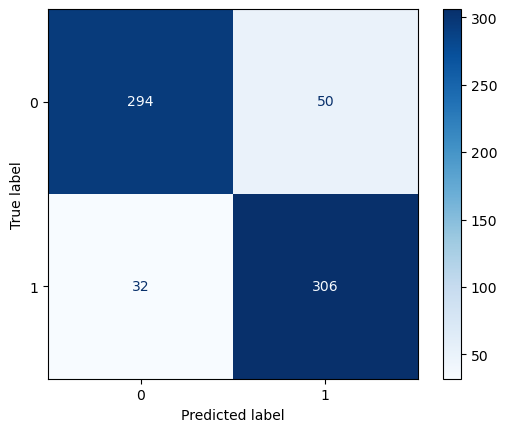

In [28]:
cmt=confusion_matrix(y_test,y_prediction)
display=ConfusionMatrixDisplay(cmt,display_labels=[0,1])
display.plot(cmap='Blues')
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier


In [52]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
#KNeighoborsClassifier
y_predection=KNC.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
KNNacc=round(accuracy_score(y_test,y_prediction),2)
KNNpr=round(precision_score(y_test,y_prediction),2)
KNNrecall=round(recall_score(y_test,y_prediction),2)
KNNf1=round(f1_score(y_test,y_prediction),2)

In [57]:
#Navibias
from sklearn.naive_bayes import GaussianNB


In [59]:
NB=GaussianNB()
NB

GaussianNB()

In [60]:
NB.fit(x_train,y_train)

GaussianNB()

In [62]:
y_predection=NB.predict(x_test)

In [65]:
NBacc=round(accuracy_score(y_test,y_predection),2)
NBpr=round(precision_score(y_test,y_predection),2)
NBrecall=round(recall_score(y_test,y_predection),2)
NBf1=round(f1_score(y_test,y_predection),2)

In [66]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR

LogisticRegression()

In [67]:
logR.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_predection=logR.predict(x_test)

In [69]:
LORacc=round(accuracy_score(y_test,y_predection),2)
LORpr=round(precision_score(y_test,y_predection),2)
LORrecall=round(recall_score(y_test,y_predection),2)
LORf1=round(f1_score(y_test,y_predection),2)

In [71]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC

RandomForestClassifier()

In [72]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_predection=RFC.predict(x_test)

In [74]:
RFCacc=round(accuracy_score(y_test,y_predection),2)
RFCpr=round(precision_score(y_test,y_predection),2)
RFCrecall=round(recall_score(y_test,y_predection),2)
RFCf1=round(f1_score(y_test,y_predection),2)

In [29]:
# ROC:Reviver Operative character
#AUC : Area under the curvw

# X-axis : FP

# Y-axis : TPR

#values probablity

In [39]:
prob=dtree.predict_proba(x_test)
prob_df=pd.DataFrame(prob,columns=['No','Yes'])
# NO NO Yes 0=Yes,1=no
#0   0    1   here we have the problability of yes or no so if their is 1 means high problaty of that for  eg in 1 1 is ate no so the answer is no

In [42]:
prob_yes=prob[:,1]
prob_yes

array([0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0.

In [43]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

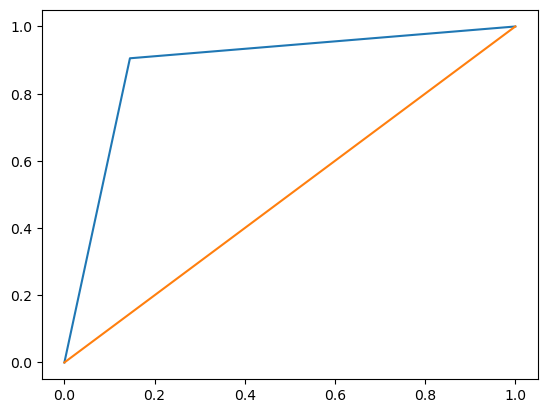

In [47]:
fpr,tpr,thresh=roc_curve(y_test,prob_yes)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

In [49]:
print(roc_auc_score(y_test,prob_yes))
print(auc(fpr,tpr))


0.8799883032888399
0.8799883032888399


In [76]:
prob=KNC.predict_proba(x_test)
prob_df=pd.DataFrame(prob,columns=['No','Yes'])
# NO NO Yes 0=Yes,1=no
#0   0    1   here we have the problability of yes or no so if their is 1 means high problaty of that for  eg in 1 1 is ate no so the answer is no

In [77]:
prob_yes=prob[:,1]
prob_yes

array([0.8, 0.4, 1. , 1. , 1. , 0.8, 1. , 0.6, 0. , 1. , 0. , 0.8, 0.6,
       0. , 1. , 1. , 1. , 0.2, 0. , 0.8, 1. , 1. , 0.6, 0.8, 0.6, 0. ,
       1. , 0.8, 0.6, 0. , 1. , 1. , 1. , 0.8, 1. , 0.2, 0. , 1. , 0.8,
       1. , 1. , 1. , 1. , 0. , 1. , 0. , 1. , 0.8, 0.6, 1. , 1. , 0.4,
       0.2, 0.2, 0.2, 1. , 1. , 1. , 1. , 0.8, 1. , 0. , 0.6, 1. , 0.2,
       1. , 1. , 0. , 1. , 0. , 1. , 0. , 0.8, 1. , 1. , 0. , 0. , 1. ,
       1. , 1. , 1. , 1. , 0. , 1. , 1. , 0.4, 0. , 1. , 1. , 0.2, 0. ,
       0. , 1. , 1. , 1. , 1. , 0.2, 1. , 0.6, 1. , 1. , 0.4, 0. , 0.4,
       0.4, 0. , 0.8, 1. , 0.8, 0.2, 0.2, 0.2, 0.4, 1. , 1. , 1. , 1. ,
       0. , 0. , 1. , 0. , 0. , 0.2, 0.6, 1. , 1. , 0. , 0. , 1. , 0.4,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0. , 1. , 1. , 1. ,
       1. , 1. , 0. , 0.2, 0. , 1. , 1. , 0. , 0.8, 1. , 0.4, 1. , 1. ,
       0.2, 0. , 0. , 1. , 1. , 0.6, 0.2, 0.6, 0. , 1. , 1. , 1. , 1. ,
       0.8, 0.6, 0.4, 1. , 1. , 1. , 0. , 1. , 0.2, 0. , 1. , 0.

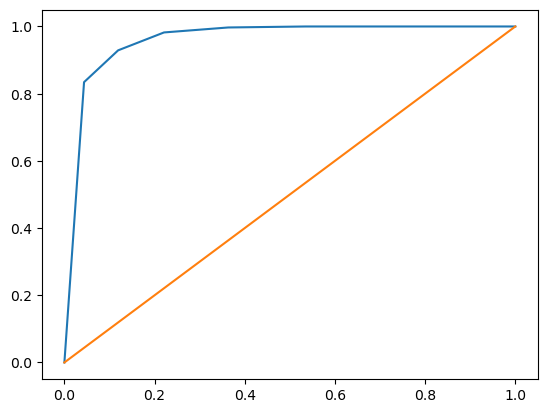

In [78]:
fpr,tpr,thresh=roc_curve(y_test,prob_yes)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

In [79]:
prob=NB.predict_proba(x_test)
prob_df=pd.DataFrame(prob,)
prob_df=pd.DataFrame(prob,columns=['No','Yes'])


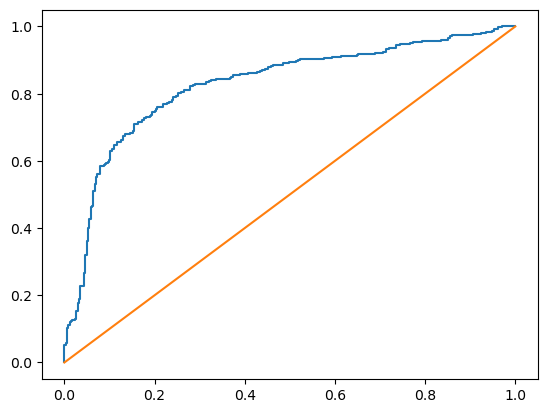

In [80]:
prob_yes=prob[:,1]
fpr,tpr,thresh=roc_curve(y_test,prob_yes)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

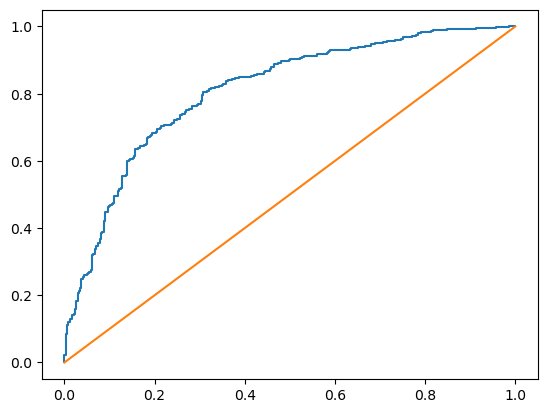

In [84]:
prob=logR.predict_proba(x_test)
prob_df=pd.DataFrame(prob)
prob_df=pd.DataFrame(prob,columns=['No','Yes'])
prob_yes=prob[:,1]
fpr,tpr,thresh=roc_curve(y_test,prob_yes)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

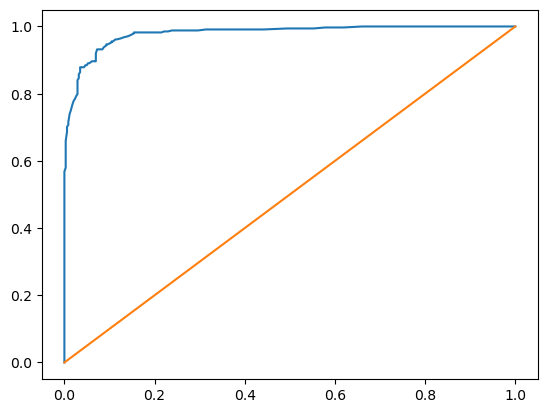

In [85]:
prob=RFC.predict_proba(x_test)
prob_yes=prob[:,1]
fpr,tpr,thresh=roc_curve(y_test,prob_yes)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])